# Assignment 1 on Natural Language Processing

## Date : 26th July, 2019

### Instructor : Prof. Sudeshna Sarkar

### Teaching Assistants : Ishani Mondal, Debanjana Kar, Sukannya Purkayastha

The central idea of this assignment is to make you familiar with programming in python and also the language modelling task of natural language processing using the python library, nltk. Please find the installation details below.



## Installation of NLTK and Anaconda:

To ensure we are all on the same page, the coding environment will be in `python3`. We suggest downloading 
Anaconda3 and creating a separate environment to do this assignment. <br> 


The link to anaconda3 for Windows and Linux is available here https://docs.anaconda.com/anaconda/install/. <br>
The steps to install NLTK is available on the link: <br>

`sudo pip3 install nltk` <br>
`python3` <br>
`nltk.download()` <br>

To install gensim, use the following command: (detailed tutorial) <br>
`conda install -c conda-forge gensim` <br>

<br>

Note : For the purpose of your convenience, we are also providing you with a demo hands-on ipython notebook explaining the basics of language modelling using nltk.

## Assignment Tasks

Use the corpus given. Ignore the .concept files and use the .txt files for each disease abstract.

### Task A: In this sub-task, you are expected to carry out the following tasks:

**Tokenize** the corpus into sentences and words (for each of the pos and neg class). **Print the number of sentences and words.** <br>
**Perform case-folding** on the corpus. <br>
**Remove the stopwords** from the corpus and print the count of the rest of the non stop-words occurring in the corpus.<br>

In [4]:
#Write the code for Task A
import os
import nltk
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
nltk.download('stopwords')
files = []
words=[]
sent=[]
for i in os.listdir('./NCBI_Data/'):
    if i.endswith('.txt'):
        files.append(i)
for file in files:             # in this loop tokenize words and sentences
    tokenizer = RegexpTokenizer(r'\w+')
    file_content = open('./NCBI_Data/'+file).read()
    tokens = tokenizer.tokenize(file_content)
    words=words+tokens
    tokens=nltk.tokenize.sent_tokenize(file_content)
    sent=sent+tokens
wordsu = list(set(words))  #taking only unique words
print('number of unique words:',len(wordsu))
print('number of total words:',len(words))
print('number of sentences:',len(sent))
words=[x.lower() for x in words] #case folding to lowercase
words_without_stop = [w for w in words if not w in stopwords.words('english')] #removing stop words
print('number of total words after removing stop words:',len(words_without_stop))
wordsn = list(set(words_without_stop))  #taking only unique words
print('number of unique words after removing stop words:',len(wordsn))


[nltk_data] Downloading package stopwords to
[nltk_data]     /home/shounak/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


number of unique words: 1266
number of total words: 4119
number of sentences: 203
number of total words after removing stop words: 2599
number of unique words after removing stop words: 1110


### Task B: In this sub-task, you are expected to carry out the following tasks:

1. **Create the following language models** on the training corpus: <br>
    i.   Unigram <br>
    ii.  Bigram <br>
    iii. Trigram <br>
    iv.  Fourgram <br>

2. **List the top 5 bigrams, trigrams, four-grams (with and without Add-1 smoothing).**
(Note: Please remove those which contain only articles, prepositions, determiners. For Example: “of the”, “in a”, etc).

In [6]:
#Write the code for Task B

from nltk import ngrams
from collections import Counter
unigrams=[]
bigrams=[]
trigrams=[]
fourgrams=[]
#n=1
unigrams.extend(words)
#n=2,3,4

bigrams.extend(ngrams(words,2))
trigrams.extend(ngrams(words,3))
fourgrams.extend(ngrams(words,4))
    
    ##similar for trigrams and fourgrams
print('top 5 unigrams:',Counter(unigrams).most_common(5))
print('top 5 biigrams:',Counter(bigrams).most_common(5))
print('top 5 trigrams:',Counter(trigrams).most_common(5))
print('top 5 fourgrams:',Counter(fourgrams).most_common(5))

top 5 unigrams: [('the', 231), ('of', 220), ('in', 153), ('and', 121), ('a', 88)]
top 5 biigrams: [(('of', 'the'), 56), (('in', 'the'), 32), (('mutations', 'in'), 15), (('and', 'the'), 13), (('to', 'be'), 10)]
top 5 trigrams: [(('mutations', 'in', 'the'), 6), (('deficiency', 'of', 'the'), 6), (('germline', 'mutations', 'in'), 6), (('transmission', 'of', 'congenital'), 5), (('the', 'rb1', 'gene'), 4)]
top 5 fourgrams: [(('paternal', 'transmission', 'of', 'congenital'), 4), (('transmission', 'of', 'congenital', 'dm'), 4), (('recombinant', 'fraction', 'of', '0'), 4), (('patients', 'with', 'isolated', 'unilateral'), 3), (('with', 'isolated', 'unilateral', 'retinoblastoma'), 3)]


In [7]:
#stopwords = code for downloading stop words through nltk
from nltk.corpus import stopwords

#print top 10 unigrams, bigrams after removing stopwords
uni_processed = [p for p in unigrams if p not in stopwords.words('english')]
fdist_uni = nltk.FreqDist(uni_processed)
print('top 10 unigrams after removing stop words',list(fdist_uni.keys())[:10])

bi_processed=[]
tri_processed=[]
four_processed=[]

bi_processed.extend(ngrams(words_without_stop,2))
tri_processed.extend(ngrams(words_without_stop,3))
four_processed.extend(ngrams(words_without_stop,4))

fdist_bi = nltk.FreqDist(bi_processed)
print('top 10 bigrams after removing stop words',list(fdist_bi.keys())[:10])
fdist_tri = nltk.FreqDist(tri_processed)
print('top 10 trigrams after removing stop words',list(fdist_tri.keys())[:10])
fdist_four = nltk.FreqDist(four_processed)
print('top 10 fourgrams after removing stop words',list(fdist_four.keys())[:10])

#print top 10 bigrams, trigrams, fourgrams after removing stopwords

top 10 unigrams after removing stop words ['clustering', 'missense', 'mutations', 'ataxia', 'telangiectasia', 'gene', 'sporadic', 'cell', 'leukaemia', 'recessive']
top 10 bigrams after removing stop words [('clustering', 'missense'), ('missense', 'mutations'), ('mutations', 'ataxia'), ('ataxia', 'telangiectasia'), ('telangiectasia', 'gene'), ('gene', 'sporadic'), ('sporadic', 'cell'), ('cell', 'leukaemia'), ('leukaemia', 'ataxia'), ('telangiectasia', 'recessive')]
top 10 trigrams after removing stop words [('clustering', 'missense', 'mutations'), ('missense', 'mutations', 'ataxia'), ('mutations', 'ataxia', 'telangiectasia'), ('ataxia', 'telangiectasia', 'gene'), ('telangiectasia', 'gene', 'sporadic'), ('gene', 'sporadic', 'cell'), ('sporadic', 'cell', 'leukaemia'), ('cell', 'leukaemia', 'ataxia'), ('leukaemia', 'ataxia', 'telangiectasia'), ('ataxia', 'telangiectasia', 'recessive')]
top 10 fourgrams after removing stop words [('clustering', 'missense', 'mutations', 'ataxia'), ('missense

### With Smoothing

In [8]:
#You are to perform Add-1 smoothing here:
# Probability(unigram) = count(unigram)/Number of unique unigrams + Total number of unigrams
import heapq
from heapq import nlargest

v=len(fdist_uni)         # in all cases v represents all n-1 grams possible
# Unigrams #
uni_p={} 
total_uni=sum(fdist_uni.values())
for i,j in fdist_uni.items():
    uni_p[i]=(j+1)*(1.0)/(v+total_uni)
#write similar code for bigram, trigram and fourgrams
# Bigrams #
bi_p={}
for i,j in fdist_bi.items():
    bi_p[i]=(j+1)*(1.0)/(v+fdist_uni[i[0]])    
# Trigrams #
v=len(fdist_bi)
tri_p={}
for i,j in fdist_tri.items():
    tri_p[i]=(j+1)*(1.0)/(v+fdist_bi[(i[0],i[1])])    
# Fourgrams #
v=len(fdist_tri)
four_p={}
for i,j in fdist_four.items():
    four_p[i]=(j+1)*(1.0)/(v+fdist_tri[(i[0],i[1],i[2])])    
#Print top 10 unigram, bigram, trigram, fourgram after smoothing
uni_10=nlargest(10, uni_p, key=uni_p.get)
print("Top 10 unigrams after smoothing are :")
print(uni_10)
bi_10=nlargest(10, bi_p, key=bi_p.get)
print("Top 10 bigrams after smoothing are :")
print(bi_10)
tri_10=nlargest(10, tri_p, key=tri_p.get)
print("Top 10 trigrams after smoothing are :")
print(tri_10)
four_10=nlargest(10, four_p, key=four_p.get)
print("Top 10 fourgrams after smoothing are :")
print(four_10)

Top 10 unigrams after smoothing are :
['gene', 'mutation', 'mutations', 'patients', 'b', 'hla', 'found', 'disease', 'deficiency', 'dm']
Top 10 bigrams after smoothing are :
[('factor', 'b'), ('c2', 'deficiency'), ('myotonic', 'dystrophy'), ('germline', 'mutations'), ('hla', 'b'), ('rb1', 'gene'), ('ctg', 'repeat'), ('missense', 'mutation'), ('ovarian', 'cancer'), ('breast', 'ovarian')]
Top 10 trigrams after smoothing are :
[('breast', 'ovarian', 'cancer'), ('paternal', 'transmission', 'congenital'), ('recombinant', 'fraction', '0'), ('transmission', 'congenital', 'dm'), ('patients', 'isolated', 'unilateral'), ('isolated', 'unilateral', 'retinoblastoma'), ('dz', 'twin', 'pairs'), ('brca1', 'nuclear', 'dots'), ('properdin', 'factor', 'b'), ('tumor', 'suppressor', 'gene')]
Top 10 fourgrams after smoothing are :
[('patients', 'isolated', 'unilateral', 'retinoblastoma'), ('paternal', 'transmission', 'congenital', 'dm'), ('breast', 'ovarian', 'cancer', 'families'), ('constitutional', 'rb1', 

### Predict the next word using statistical language modelling

Using the above bigram, trigram, and fourgram models that you just experimented with, **predict the next word given the previous n(=2, 3, 4)-grams** for the sentences below.

In [9]:
str1 = 'A new tumor suppressor gene, PTEN/MMAC1, was isolated recently'
str2 = 'The average age of disease'

In [10]:
# For str1, you are to predict the next  2 possible word sequences using your trained smoothed models. The answers can be as below:()
#     1) 'A new tumor suppressor gene, PTEN/MMAC1, was isolated recently' *genuinely*
#     2)  'A new tumor suppressor gene, PTEN/MMAC1, was isolated recently' *yesterday*
# For str2, you are to predict the next 2 possible word sequences using your trained smoothed models such as:
#     (1) 'The average age of disease', *hinders*
#     (2) 'The average age of disease', *past*
# The above answers are not solutions but just examples to explain the task.
import heapq
from heapq import nlargest
#For str1
print('for str1:')
tokenizer = RegexpTokenizer(r'\w+')
words = tokenizer.tokenize(str1)
words=[x.lower() for x in words] #case folding to lowercase
words= [w for w in words if not w in stopwords.words('english')] #removing stop words
#using n=2
words2=words[-1:]
bi={}
for i,j in bi_p.items():
    if(i[0]==words2[0]):
        bi[i[1]]=j

bi2=nlargest(2, bi, key=bi.get)
print('using n=2 next two most possible words are:',bi2)

#using n=3
words3=words[-2:]
tri={}
for i,j in tri_p.items():
    if((i[0]==words3[0])and(i[1]==words3[1])):
        tri[i[2]]=j

tri2=nlargest(2, tri, key=tri.get)
print('using n=3 next two most possible words are:(only one as no other trigram has the same last two words)',tri2)
#using n=4
words4=words[-3:]
four={}
for i,j in four_p.items():
    if((i[0]==words4[0])and(i[1]==words4[1])and(i[2]==words4[2])):
        four[i[3]]=j

four2=nlargest(2, four, key=four.get)
print('using n=4 next two most possible words are:(only one as no other fourgram has the same last 3 words)',four2)
    
#For str2
print('for str2:')
tokenizer = RegexpTokenizer(r'\w+')
words = tokenizer.tokenize(str2)
words=[x.lower() for x in words] #case folding to lowercase
words= [w for w in words if not w in stopwords.words('english')] #removing stop words
#using n=2
words2=words[-1:]
bi={}
for i,j in bi_p.items():
    if(i[0]==words2[0]):
        bi[i[1]]=j

bi2=nlargest(2, bi, key=bi.get)
print('using n=2 next two most possible words are:',bi2)

#using n=3
words3=words[-2:]
tri={}
for i,j in tri_p.items():
    if((i[0]==words3[0])and(i[1]==words3[1])):
        tri[i[2]]=j

tri2=nlargest(2, tri, key=tri.get)
print('using n=3 next two most possible words are:(only one as no other trigram has the same last two words)',tri2)
#using n=4
words4=words[-3:]
four={}
for i,j in four_p.items():
    if((i[0]==words4[0])and(i[1]==words4[1])and(i[2]==words4[2])):
        four[i[3]]=j

four2=nlargest(2, four, key=four.get)
print('using n=4 next two most possible words are:(only one as no other fourgram has the same last 3 words)',four2)        
    

for str1:
using n=2 next two most possible words are: ['region', 'review']
using n=3 next two most possible words are:(only one as no other trigram has the same last two words) ['region']
using n=4 next two most possible words are:(only one as no other fourgram has the same last 3 words) ['region']
for str2:
using n=2 next two most possible words are: ['severity', 'concordant']
using n=3 next two most possible words are:(only one as no other trigram has the same last two words) ['onset']
using n=4 next two most possible words are:(only one as no other fourgram has the same last 3 words) ['onset']


### Task C: In this task, you are to perform the following tasks:

1. **Train word vectors** on the given corpus. In order to train the word vectors on your corpus, using the gensim module (https://radimrehurek.com/gensim/models/word2vec.html) with pre-trained Google word embeddings (GoogleNews-vectors) . For multi-word disease mentions, concatenate each word with a ‘_’.  <br>

2. **Construct a t-SNE plot** of the trained word vectors of the disease mentions.

3. **Repeat experiment 1. and 2.** using the following hyper-parameter settings:
Use window size = 5, 10.<br>
Use embedding dimension = 50, 100, 200.<br>


/home/shounak/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:37: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).


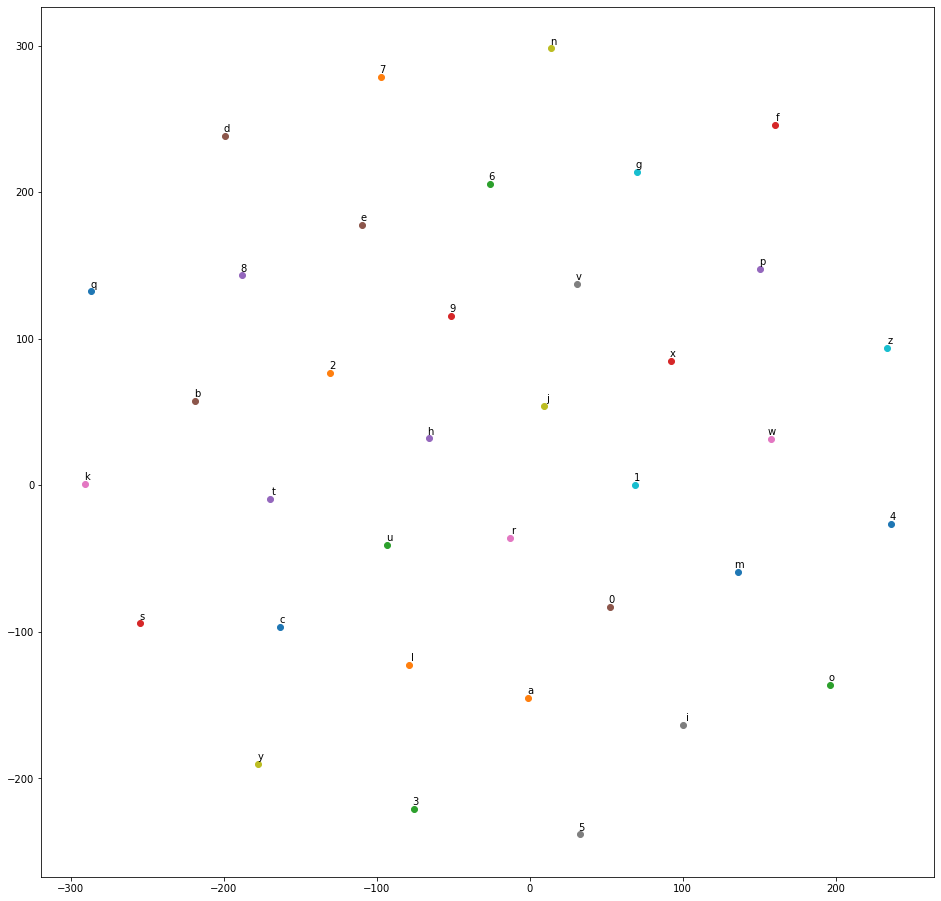

/home/shounak/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:37: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).


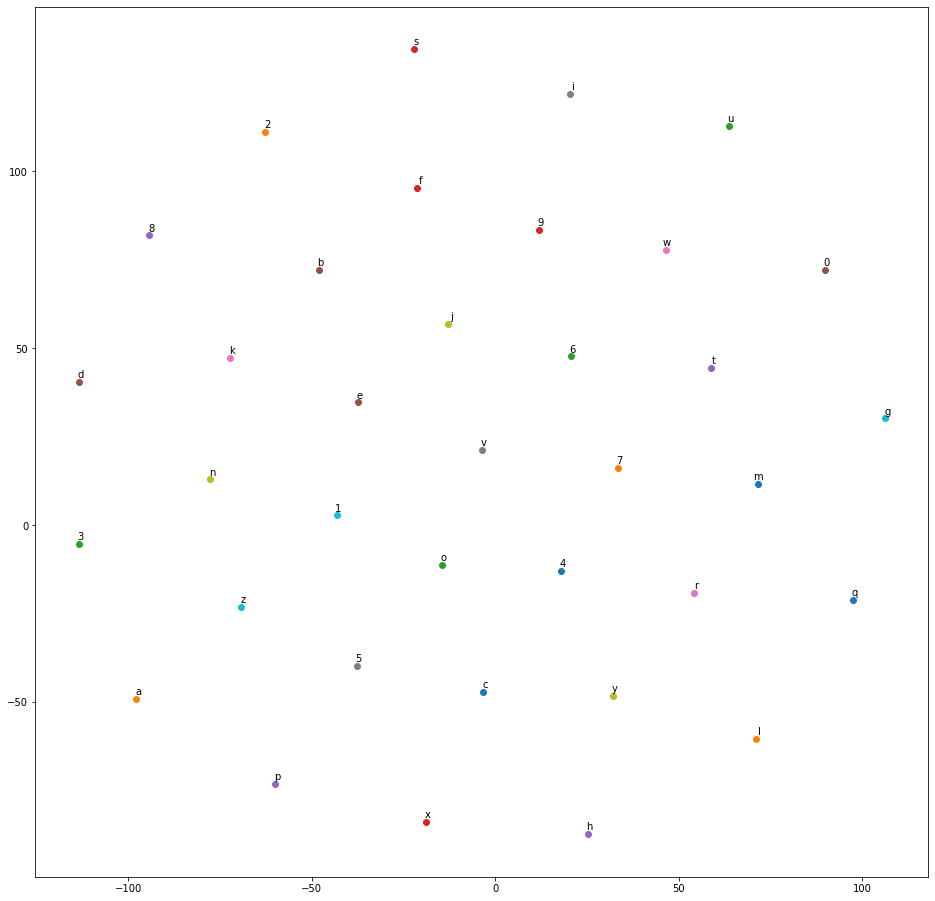

/home/shounak/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:37: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).


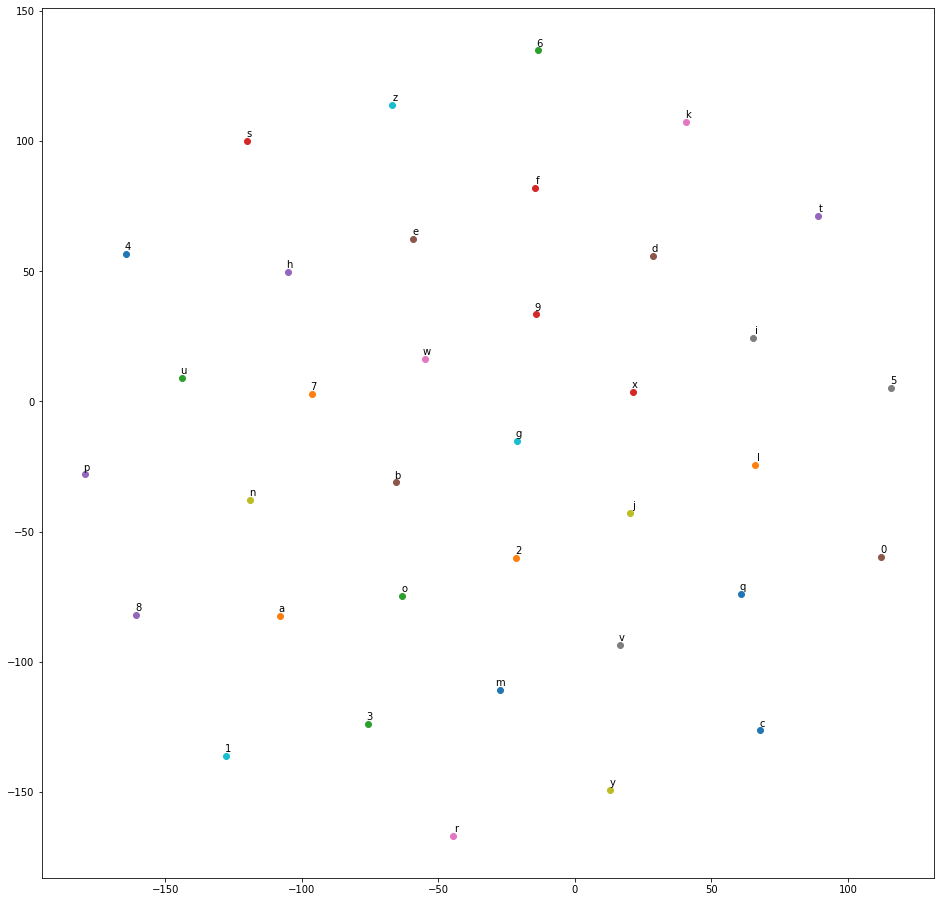

/home/shounak/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:37: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).


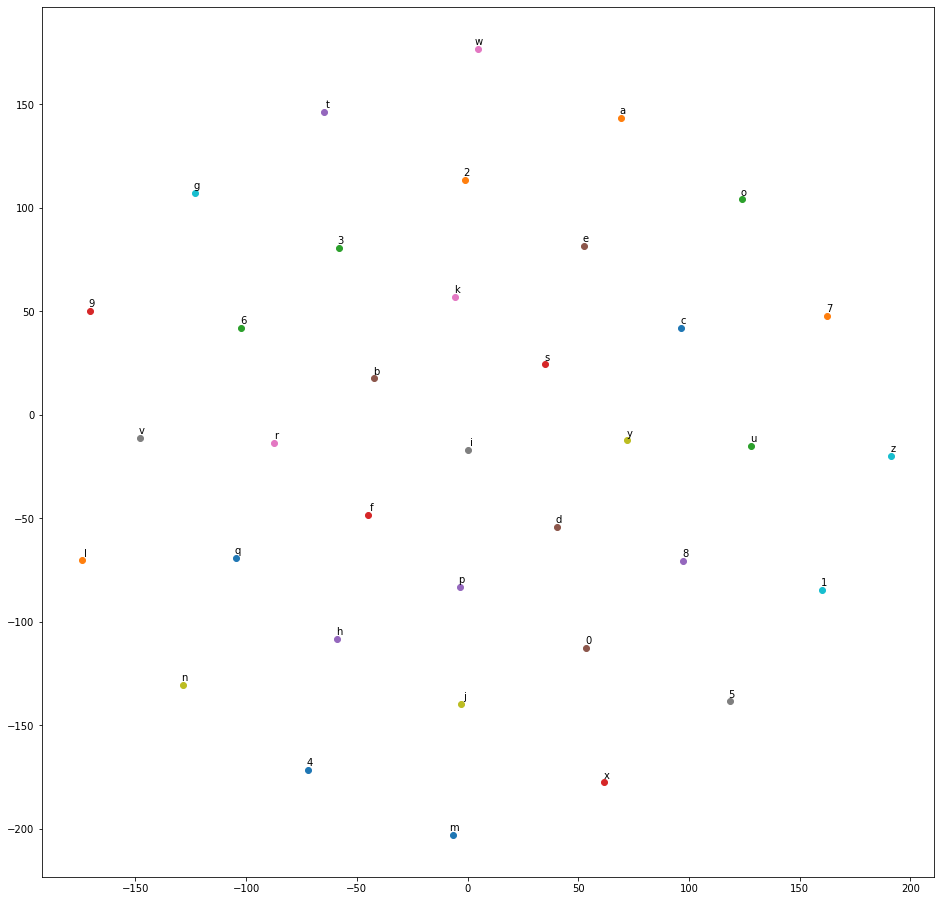

/home/shounak/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:37: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).


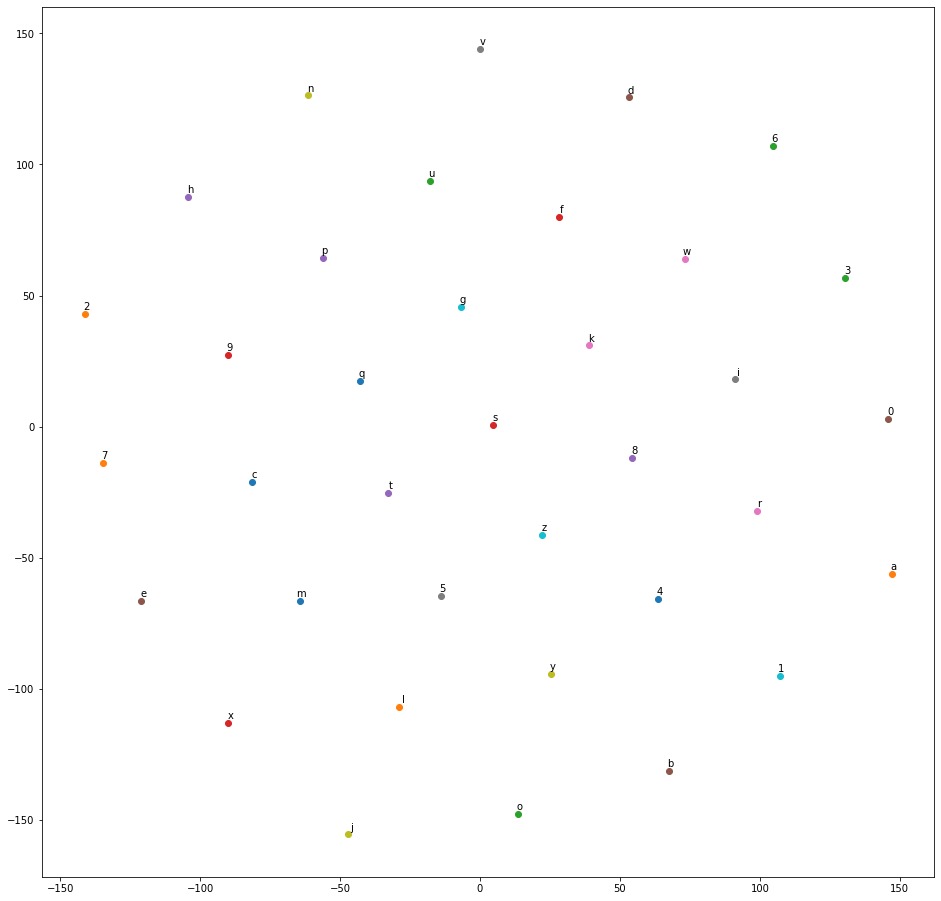

/home/shounak/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:37: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).


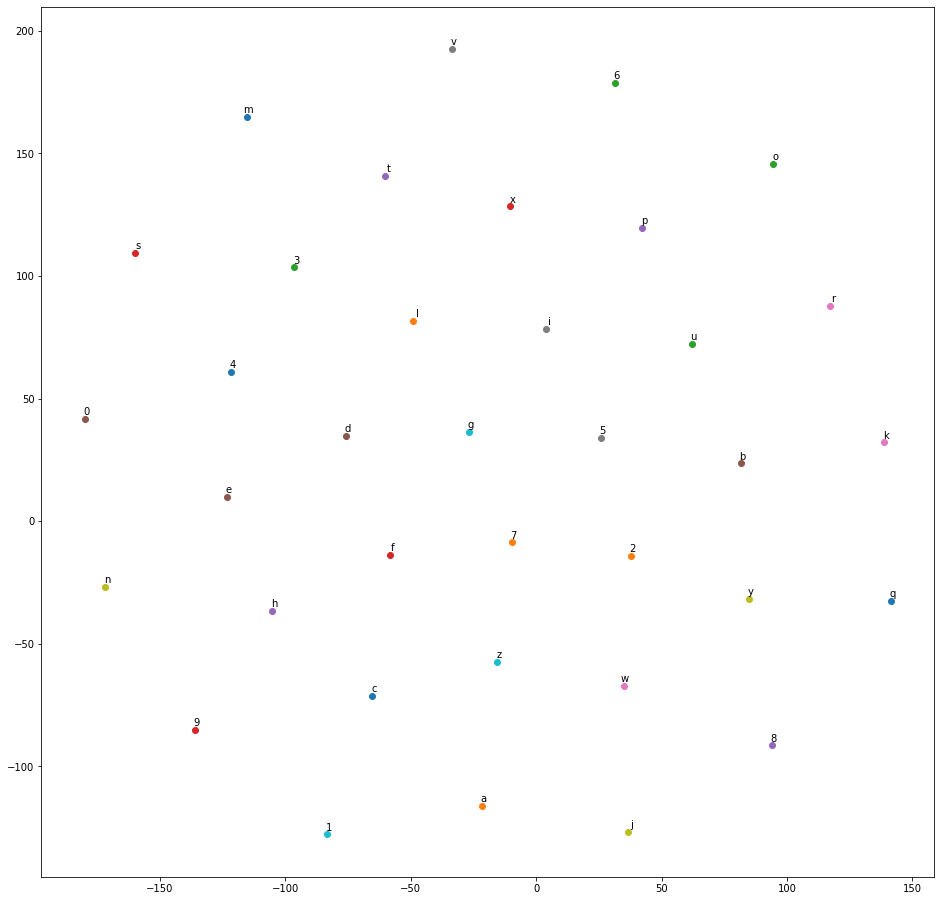

In [13]:
#Write the code for Task C
##t-SNE for different window size and embedding dimensions
import gensim
from gensim.models import word2vec, Phrases

new_bi = Phrases(uni_processed, min_count=1, delimiter=b' ')
new_tri = Phrases(new_bi[uni_processed], min_count=1, delimiter=b' ')
tri_sent = []
for st in uni_processed:
    new_bi_ = new_bi[st]
    new_tri_ = new_tri[new_bi[st]]
    tri_sent.append(new_tri_)

model1 = gensim.models.Word2Vec(tri_sent, size=50, window=5, min_count=1,workers=4)

model2 = gensim.models.Word2Vec(tri_sent, size=50, window=10, min_count=1,workers=4)

model3 = gensim.models.Word2Vec(tri_sent, size=100, window=5, min_count=1,workers=4)

model4 = gensim.models.Word2Vec(tri_sent, size=100, window=10, min_count=1,workers=4)

model5 = gensim.models.Word2Vec(tri_sent, size=200, window=5, min_count=1,workers=4)

model6 = gensim.models.Word2Vec(tri_sent, size=200, window=10, min_count=1,workers=4)



from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
%matplotlib inline
def tsne(model):
    
    Y = []     #function for tsne plot
    X = []

    for _ in model.wv.vocab:
        X.append(model[_])
        Y.append(_)
    
    tsne = TSNE(perplexity=40, n_components=2, init='pca', n_iter=2500, random_state=23)
    new = tsne.fit_transform(X)

    x = []
    y = []
    for _ in new:
        x.append(_[0])
        y.append(_[1])
        
    plt.figure(figsize=(16, 16)) 
    for _ in range(len(x)):
        plt.scatter(x[_],y[_])
        plt.annotate(Y[_],
                     xy=(x[_], y[_]),
                     xytext=(5, 2),
                     textcoords='offset points',
                     ha='right',
                     va='bottom')
    plt.show()
    
tsne(model1)
tsne(model2)
tsne(model3)
tsne(model4)
tsne(model5)
tsne(model6)


### Task D: Predict the next word using neural language modelling

Using LSTM Language modelling, you are expected to **train your own word vectors and predict the next word, given the context**.

In [26]:
#code for Task D

from numpy import array
from keras.preprocessing.text import Tokenizer
from keras.utils import to_categorical
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Embedding


## Prepare the corpus from the .txt files and store it in a string variable i.e data_str. It should contain the 
## sentences splitted by "\n".
import os, glob
print(os.getcwd())

# os.chdir('./NCBI_Data')
data=[]
for file in glob.glob("*.txt"):
    f=open(file)
    content=f.read()
    for line in content.split("\n"):
        if(line!=""):
            data.append(line)

#print(data)
data_str="\n".join(data)
print(data_str)


# generate the sequence 

def generate_seq(model, tokenizer, max_length, seed_text, n_words):
    
    in_text = seed_text
    for _ in range(n_words):
        enco=tokenizer.texts_to_sequences([in_text])[0]
        enco=pad_sequences([enco],maxlen=max_length, padding='pre')
        pred=model.predict_classes(enco,verbose=0)
        output=''
        for word,i in tokenizer.word_index.items():
            if i==pred:
                output=word
                break
        in_text += ' ' + output
    return in_text
 
tokenizer = Tokenizer()
tokenizer.fit_on_texts([data_str])

# Write the code for encoding text to sequences here and store in encoded
enco = tokenizer.texts_to_sequences([data_str])[0]


# retrieve vocabulary size
vocab_size = len(tokenizer.word_index) + 1
print('Vocabulary Size: %d' % vocab_size)
# encode 2 words -> 1 word
sequences = list()
for i in range(2, len(enco)):
    sequence = enco[i-2:i+1]
    sequences.append(sequence)


print('Total Sequences: %d' % len(sequences))
# pad sequences
max_length = max([len(seq) for seq in sequences])
sequences = pad_sequences(sequences, maxlen=max_length, padding='pre')
print('Max Sequence Length: %d' % max_length)
# split into input and output elements
sequences = array(sequences)
X, y = sequences[:,:-1],sequences[:,-1]
y = to_categorical(y, num_classes=vocab_size)
# define model
model = Sequential()
model.add(Embedding(vocab_size, 10, input_length=max_length-1))
model.add(LSTM(50))
model.add(Dense(vocab_size, activation='softmax'))
print(model.summary())
# compile network
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
# fit network
model.fit(X, y, epochs=500, verbose=2)
# evaluate model
print(generate_seq(model, tokenizer, max_length-1, 'A new tumor suppressor gene, PTEN/MMAC1, was isolated recently', 1))
print(generate_seq(model, tokenizer, max_length-1, 'The average age of disease', 1))

W0812 01:28:33.855687 140714049537792 deprecation_wrapper.py:119] From /home/shounak/anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0812 01:28:33.868561 140714049537792 deprecation_wrapper.py:119] From /home/shounak/anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0812 01:28:33.870416 140714049537792 deprecation_wrapper.py:119] From /home/shounak/anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.



/media/shounak/6678A35C78A32A2F/third_year/nlp/a1/Assignment-1/NCBI_Data
Clustering of missense mutations in the ataxia-telangiectasia gene in a sporadic T-cell leukaemia.
Ataxia-telangiectasia (A-T) is a recessive multi-system disorder caused by mutations in the ATM gene at 11q22-q23 (ref. 3). The risk of cancer, especially lymphoid neoplasias, is substantially elevated in A-T patients and has long been associated with chromosomal instability.
By analysing tumour DNA from patients with sporadic T-cell prolymphocytic leukaemia (T-PLL), a rare clonal malignancy with similarities to a mature T-cell leukaemia seen in A-T, we demonstrate a high frequency of ATM mutations in T-PLL. In marked contrast to the ATM mutation pattern in A-T, the most frequent nucleotide changes in this leukaemia were missense mutations.
These clustered in the region corresponding to the kinase domain, which is highly conserved in ATM-related proteins in mouse, yeast and Drosophila.
The resulting amino-acid substi

W0812 01:28:34.393600 140714049537792 deprecation_wrapper.py:119] From /home/shounak/anaconda3/lib/python3.7/site-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0812 01:28:34.421819 140714049537792 deprecation_wrapper.py:119] From /home/shounak/anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:3295: The name tf.log is deprecated. Please use tf.math.log instead.

W0812 01:28:34.521684 140714049537792 deprecation.py:323] From /home/shounak/anaconda3/lib/python3.7/site-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 2, 10)             11940     
_________________________________________________________________
lstm_1 (LSTM)                (None, 50)                12200     
_________________________________________________________________
dense_1 (Dense)              (None, 1194)              60894     
Total params: 85,034
Trainable params: 85,034
Non-trainable params: 0
_________________________________________________________________
None


W0812 01:28:35.097022 140714049537792 deprecation_wrapper.py:119] From /home/shounak/anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.



Epoch 1/500
 - 1s - loss: 6.8991 - acc: 0.0522
Epoch 2/500
 - 1s - loss: 6.1194 - acc: 0.0559
Epoch 3/500
 - 1s - loss: 6.0025 - acc: 0.0561
Epoch 4/500
 - 1s - loss: 5.9515 - acc: 0.0561
Epoch 5/500
 - 1s - loss: 5.9139 - acc: 0.0549
Epoch 6/500
 - 1s - loss: 5.8822 - acc: 0.0551
Epoch 7/500
 - 1s - loss: 5.8604 - acc: 0.0571
Epoch 8/500
 - 1s - loss: 5.8404 - acc: 0.0564
Epoch 9/500
 - 1s - loss: 5.8204 - acc: 0.0590
Epoch 10/500
 - 0s - loss: 5.8023 - acc: 0.0561
Epoch 11/500
 - 1s - loss: 5.7819 - acc: 0.0571
Epoch 12/500
 - 1s - loss: 5.7594 - acc: 0.0646
Epoch 13/500
 - 1s - loss: 5.7358 - acc: 0.0593
Epoch 14/500
 - 1s - loss: 5.7089 - acc: 0.0663
Epoch 15/500
 - 1s - loss: 5.6822 - acc: 0.0668
Epoch 16/500
 - 1s - loss: 5.6513 - acc: 0.0683
Epoch 17/500
 - 1s - loss: 5.6194 - acc: 0.0707
Epoch 18/500
 - 1s - loss: 5.5824 - acc: 0.0775
Epoch 19/500
 - 1s - loss: 5.5445 - acc: 0.0802
Epoch 20/500
 - 1s - loss: 5.4986 - acc: 0.0850
Epoch 21/500
 - 1s - loss: 5.4512 - acc: 0.0877
E

Epoch 171/500
 - 1s - loss: 0.8872 - acc: 0.7542
Epoch 172/500
 - 1s - loss: 0.8821 - acc: 0.7530
Epoch 173/500
 - 1s - loss: 0.8744 - acc: 0.7549
Epoch 174/500
 - 1s - loss: 0.8658 - acc: 0.7566
Epoch 175/500
 - 1s - loss: 0.8611 - acc: 0.7603
Epoch 176/500
 - 1s - loss: 0.8555 - acc: 0.7583
Epoch 177/500
 - 1s - loss: 0.8486 - acc: 0.7624
Epoch 178/500
 - 1s - loss: 0.8425 - acc: 0.7632
Epoch 179/500
 - 1s - loss: 0.8358 - acc: 0.7603
Epoch 180/500
 - 1s - loss: 0.8295 - acc: 0.7644
Epoch 181/500
 - 1s - loss: 0.8240 - acc: 0.7639
Epoch 182/500
 - 1s - loss: 0.8168 - acc: 0.7651
Epoch 183/500
 - 1s - loss: 0.8105 - acc: 0.7675
Epoch 184/500
 - 1s - loss: 0.8051 - acc: 0.7646
Epoch 185/500
 - 1s - loss: 0.7999 - acc: 0.7649
Epoch 186/500
 - 1s - loss: 0.7928 - acc: 0.7680
Epoch 187/500
 - 1s - loss: 0.7886 - acc: 0.7692
Epoch 188/500
 - 1s - loss: 0.7837 - acc: 0.7673
Epoch 189/500
 - 1s - loss: 0.7780 - acc: 0.7702
Epoch 190/500
 - 1s - loss: 0.7730 - acc: 0.7685
Epoch 191/500
 - 1s 

 - 1s - loss: 0.4634 - acc: 0.7880
Epoch 339/500
 - 1s - loss: 0.4618 - acc: 0.7867
Epoch 340/500
 - 1s - loss: 0.4620 - acc: 0.7880
Epoch 341/500
 - 1s - loss: 0.4616 - acc: 0.7858
Epoch 342/500
 - 1s - loss: 0.4601 - acc: 0.7863
Epoch 343/500
 - 1s - loss: 0.4590 - acc: 0.7870
Epoch 344/500
 - 1s - loss: 0.4594 - acc: 0.7887
Epoch 345/500
 - 1s - loss: 0.4596 - acc: 0.7819
Epoch 346/500
 - 1s - loss: 0.4583 - acc: 0.7882
Epoch 347/500
 - 1s - loss: 0.4587 - acc: 0.7867
Epoch 348/500
 - 1s - loss: 0.4567 - acc: 0.7880
Epoch 349/500
 - 1s - loss: 0.4564 - acc: 0.7867
Epoch 350/500
 - 1s - loss: 0.4562 - acc: 0.7877
Epoch 351/500
 - 1s - loss: 0.4558 - acc: 0.7877
Epoch 352/500
 - 1s - loss: 0.4549 - acc: 0.7872
Epoch 353/500
 - 1s - loss: 0.4542 - acc: 0.7867
Epoch 354/500
 - 1s - loss: 0.4551 - acc: 0.7870
Epoch 355/500
 - 1s - loss: 0.4543 - acc: 0.7858
Epoch 356/500
 - 1s - loss: 0.4544 - acc: 0.7809
Epoch 357/500
 - 1s - loss: 0.4538 - acc: 0.7858
Epoch 358/500
 - 1s - loss: 0.4539